<a href="https://colab.research.google.com/github/karimqasim/MachineLearning/blob/master/Simple_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!wget https://storage.googleapis.com/nicksdemobucket/housing-data.csv

--2019-03-27 01:52:31--  https://storage.googleapis.com/nicksdemobucket/housing-data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816 [application/octet-stream]
Saving to: ‘housing-data.csv.1’

housing-data.csv.1  100%[===================>]     816  --.-KB/s    in 0s      

2019-03-27 01:52:31 (21.0 MB/s) - ‘housing-data.csv.1’ saved [816/816]



In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('housing-data.csv')

In [35]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


# Normalizing data

In [0]:
mean = df.mean(axis=0)
df -= mean
std = df.std(axis=0)
df /= std

In [39]:
df.head()

,sqft,bdrms,age,price
0,0.130010,-0.223675,1.191571,0.475747
1,-0.504190,-0.223675,-0.644620,-0.084074
2,0.502476,-0.223675,0.054881,0.228626
3,-0.735723,-1.537767,0.273475,-0.867025
4,1.257476,1.090417,1.410165,1.595389


In [0]:
features = df.drop(['price'], axis=1)

In [41]:
features

,sqft,bdrms,age
0,0.130010,-0.223675,1.191571
1,-0.504190,-0.223675,-0.644620
2,0.502476,-0.223675,0.054881
3,-0.735723,-1.537767,0.273475
4,1.257476,1.090417,1.410165
5,-0.019732,1.090417,0.798101
6,-0.587240,-0.223675,-1.344121
7,-0.721881,-0.223675,0.623226
8,-0.781023,-0.223675,-1.256684
9,-0.637573,-0.223675,-1.212965


Note: The dataset is too small so we can visually analyze it. 

In [42]:
features = features.values
features.shape

(47, 3)

In [43]:
labels = df[['price']].values
labels.shape

(47, 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.train import AdamOptimizer

In [0]:
model = Sequential()
model.add(Dense(3, input_shape=(3,), activation='relu'))
model.add(Dense(1))

In [0]:
model.compile(loss='mean_squared_error', optimizer=AdamOptimizer(0.01), metrics=['mean_absolute_error', 'mean_squared_error'])

In [47]:
h = model.fit(features, labels, epochs=100, validation_split=0.2)

Train on 37 samples, validate on 10 samples
Epoch 1/100
37/37 [==============================] - 0s 4ms/sample - loss: 2.0185 - mean_absolute_error: 0.9751 - mean_squared_error: 2.0185 - val_loss: 1.3670 - val_mean_absolute_error: 0.6585 - val_mean_squared_error: 1.3670
Epoch 2/100
37/37 [==============================] - 0s 383us/sample - loss: 1.8542 - mean_absolute_error: 0.9467 - mean_squared_error: 1.8542 - val_loss: 1.2757 - val_mean_absolute_error: 0.6335 - val_mean_squared_error: 1.2757
Epoch 3/100
37/37 [==============================] - 0s 329us/sample - loss: 1.7369 - mean_absolute_error: 0.9277 - mean_squared_error: 1.7369 - val_loss: 1.1834 - val_mean_absolute_error: 0.6052 - val_mean_squared_error: 1.1834
Epoch 4/100
37/37 [==============================] - 0s 325us/sample - loss: 1.6153 - mean_absolute_error: 0.9028 - mean_squared_error: 1.6153 - val_loss: 1.1043 - val_mean_absolute_error: 0.5902 - val_mean_squared_error: 1.1043
Epoch 5/100
37/37 [=======================

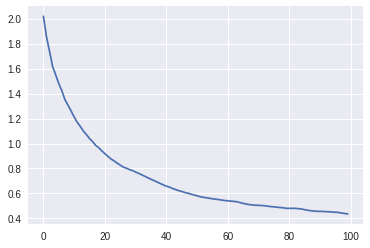

In [48]:
import matplotlib.pyplot as plt

plt.plot(h.history['mean_squared_error'])


Note: Mean Absolute Error goes down as our data gets trained. 